In [118]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# N-Particle Spring Problem

**Hamiltonian is given by:**
$$ H = T + V $$
$$ T = \sum_{i}^N{p_i \over 2m} $$
$$ V = \sum_{i}^{N-1}{{k\over2} (x_{i+1} - x_i)^2} + {k\over2}x_1^2 + {k\over2}x_N^2 $$

**Deriving the equation of motion:**
$${\partial{H}\over\partial{x_n}}  =  kx_1 - k(x_2-x_1), k(x_n-x_{n-1})-k(x_{n+1}-x_n), k(x_N-x_{N-1}) + kx_N $$
$$ m{\partial\over\partial{t}}({\partial{H}\over\partial{p_i}}) =  m\dot{x_i}$$

Gets you this:
$$ \ddot{x_1} = {k\over m}(x_1) + {k\over m}(x_2-x_1) $$
$$ \ddot{x_i} = {k\over m}(x_{n+1} - x_{n}) -{k\over m}(x_n - x_{n-1}) $$
$$ \ddot{x_N} = -{k\over m}(x_N - x_{N-1}) - {k\over m}x_N $$

**Simplified equation of motion:**
$$ \ddot{x_1} = {k\over m}(x_{2} - 2x_1) $$
$$ \ddot{x_i} = {k\over m}(x_{i+1} + x_{i-1} - 2x_i) $$
$$ \ddot{x_N} = {k\over m}(x_{N-1} - 2x_N)  $$

## Initial Conditions

In [119]:
# Spring constants
k=1
m=1

# Function parameters
N=10           # Number of particles (CHANGE THE VALUE HERE TO ADD MORE OR CUT NUMBER OF PARTICLES)
t0=0           # Initial time
T=50           # Final time
dt=0.001            # Iterations to do Euler-Cromer (CHANGE THE VALUE HERE FOR THE TIMESTEP VALUE dt)
steps=(T-t0)/dt    # dt
time = np.arange(0,T,dt)

print('dt:', dt)
print('iteration steps:', steps)

# Initial conditions
x0 = 0.5
v0 = 0.

dt: 0.001
iteration steps: 50000.0


## The Calculations

In [120]:
# The resting positions
x0l = []
# The list of positions and velocities against time
x = []
v = []
# Filling all the positions with integers and  velocities with zero (all resting)
for i in range(N):
    x0l.append(i)
    x.append(np.array([float(i)]))
    v.append(np.array([float(0)]))
# Applying initial conditions on the first particle
x[0][-1] += x0
v[0][-1] += v0

# Loop
for t in time:
    # Unnecessary but just so that every thing is updated as it is done looping every particle
    xtemp = x.copy()
    vtemp = v.copy()
    for n in range(N):
        if n == 0: # Boundary Condition 1
            dvdt = k/m*( (x[1][-1]-x0l[1]) - 2*(x[0][-1]-x0l[0]) )
        elif n == N-1: # Boundary Condition N
            dvdt = k/m*( (x[-2][-1]-x0l[-2]) -2*(x[-1][-1]-x0l[-1]) )
        else: # In between
            dvdt = k/m*( (x[n+1][-1]-x0l[n+1]) + (x[n-1][-1]-x0l[n-1]) - 2*(x[n][-1]-x0l[n]) )
        # Euler-Cromer Integration Method
        vnew = v[n][-1] + dvdt*dt
        xnew = x[n][-1] + vnew*dt
        # Appending to the temporary list
        xtemp[n] = np.append(xtemp[n], xnew)
        vtemp[n] = np.append(vtemp[n], vnew)
    # Updating the original list
    x = xtemp.copy()
    v = vtemp.copy()

## Visualizing Phase Diagram

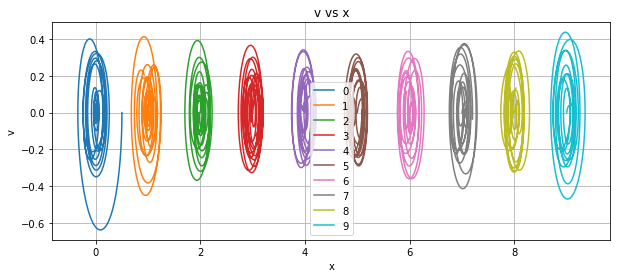

In [121]:
plt.figure(figsize=(10,4))
for n in range(N):
    plt.plot(x[n], v[n], label=str(n))
plt.title('v vs x')
plt.xlabel('x')
plt.ylabel('v')
plt.grid()
plt.legend()

## Visualizing Displacement Diagram

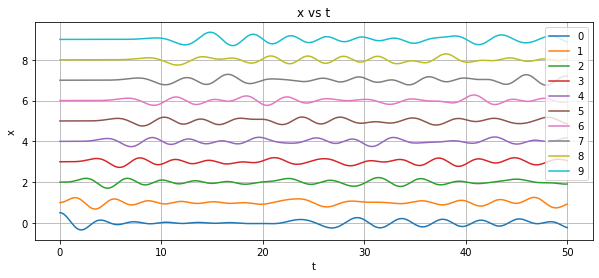

In [122]:
plt.figure(figsize=(10,4))
for n in range(N):
    plt.plot(time, x[n][:-1], label=str(n))
plt.title('x vs t')
plt.xlabel('t')
plt.ylabel('x')
plt.grid()
plt.legend()

## Calculating Energy

In [123]:
# List for total energy of each particles agaist time
E = []
# List of total energy against time (with at each time to be zero to setup)
Etot = np.zeros(len(x[0]))
for n in range(N):
    # Kinetic energy
    T = m/2*v[n]**2
    Etot += T
    if n == 0:
        V = k/2*(x[0]-x0l[0])**2 + k/2*( (x[1]-x0l[1]) - (x[0]-x0l[0]) )**2
        Etot += k/2*(x[0]-x0l[0])**2 + k/2*( (x[1]-x0l[1]) - (x[0]-x0l[0]) )**2
    elif n == N-1:
        V = k/2*( (x[-1]-x0l[-1]) - (x[-2]-x0l[-2]) ) + k/2*(x[-1]-x0l[-1])**2
        Etot += k/2*(x[n]-x0l[n])**2
    else:
        V = k/2*( (x[n]-x0l[n]) - (x[n-1]-x0l[n-1]) )**2 + k/2*( (x[n+1]-x0l[n+1]) - (x[n]-x0l[n]) )**2
        Etot += k/2*( (x[n+1]-x0l[n+1]) - (x[n]-x0l[n]) )**2
    H = T+V
    # Append total E for particle n
    E.append(H)

This is calculating the *total energy* seperately

In [124]:
Etot = k/2*(x[0]-x0l[0])**2 +  k/2*(x[-1]-x0l[-1])**2
Etot += m/2*v[-1]**2
for n in range(N-1):
    Etot += m/2*v[n]**2
    Etot += k/2*( (x[n+1]-x0l[n+1]) - (x[n]-x0l[n]) )**2

## Visualizing Energy Digram

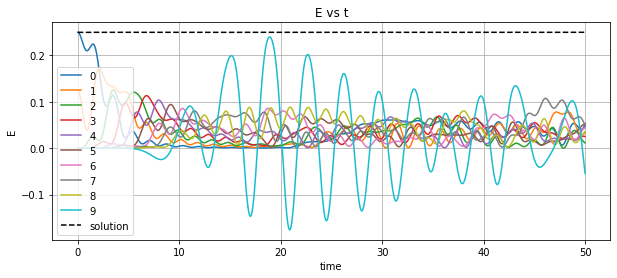

In [125]:
plt.figure(figsize=(10,4))
for n in range(N):
    plt.plot(time, E[n][:-1], label=str(n))
plt.legend()
plt.plot(time, Etot[:-1], 'k--', label='solution')
plt.title('E vs t')
plt.xlabel('time')
plt.ylabel('E')
plt.grid()
plt.legend()

### Just the total Energy

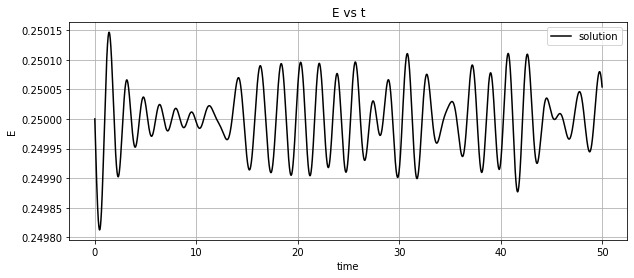

In [126]:
plt.figure(figsize=(10,4))
plt.plot(time, Etot[:-1], 'k', label='solution')
plt.legend()
plt.title('E vs t')
plt.xlabel('time')
plt.ylabel('E')
plt.grid()
plt.legend()

Up close (upscaled) it looks like the cumulation of the waves but the fluctuations are really small